# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [2]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [3]:
from IPython.display import HTML, display
from tabulate import tabulate

# Learn the glass data
glass_df = pd.read_csv("glass.data")

#extract features X and target variables y
X_glass = glass_df.drop('type', axis=1)
y_glass = glass_df['type']

clf = KNeighborsClassifier()

def analyze_model(clf: KNeighborsClassifier, p_value):
    table = []
    avg_test_acc = 0
    avg_train_acc = 0

    clf.set_params(p=p_value)
    for i in range (0,10):
        X_train, X_test, y_train, y_test = train_test_split(X_glass, y_glass, test_size=0.2, shuffle=True)
        clf.fit(X_train, y_train) 
        
        table.append([i+1, clf.score(X_train, y_train), clf.score(X_test, y_test)])
        avg_train_acc += clf.score(X_train, y_train)
        avg_test_acc += clf.score(X_test, y_test)
        
    avg_train_acc = avg_train_acc/10
    avg_test_acc = avg_test_acc/10

    #print averages
    table.append(["Average", avg_train_acc, avg_test_acc, p_value])
    headers = ["Trial", "Training Accuracy", "Test Accuracy", "P_Value"]
    display(HTML(tabulate(table, headers=headers, tablefmt='html')))

X_train, X_test, y_train, y_test = train_test_split(X_glass, y_glass, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train) 

analyze_model(clf, 1.0)
clf.set_params(p=1.0)
print("Output probabilities for a test set: " + str(clf.predict_proba(X_test)))

analyze_model(clf, 1.2)
clf.set_params(p=1.2)
print("Output probabilities for a test set: " + str(clf.predict_proba(X_test)))

analyze_model(clf, 1.4)
clf.set_params(p=1.4)
print("Output probabilities for a test set: " + str(clf.predict_proba(X_test)))

analyze_model(clf, 1.6)
clf.set_params(p=1.6)
print("Output probabilities for a test set: " + str(clf.predict_proba(X_test)))

analyze_model(clf, 1.8)
clf.set_params(p=1.8)
print("Output probabilities for a test set: " + str(clf.predict_proba(X_test)))

analyze_model(clf, 2.0)
clf.set_params(p=2.0)
print("Output probabilities for a test set: " + str(clf.predict_proba(X_test)))

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.982456,0.883721,
2,0.994152,0.976744,
3,0.994152,0.953488,
4,0.994152,1,
5,0.988304,1,
6,0.988304,1,
7,0.994152,0.976744,
8,0.994152,0.976744,
9,0.994152,0.953488,
10,0.988304,1,


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.4 0.6]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.988304,1,
2,0.988304,0.976744,
3,1,0.930233,
4,0.994152,1,
5,0.994152,1,
6,0.988304,0.976744,
7,0.988304,0.976744,
8,0.988304,1,
9,0.994152,0.976744,
10,0.994152,0.976744,


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.6 0.4 0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.8]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.994152,0.953488,
2,1,0.976744,
3,0.994152,0.976744,
4,0.994152,0.976744,
5,0.994152,1,
6,0.994152,1,
7,0.988304,1,
8,1,1,
9,0.994152,1,
10,0.988304,0.976744,


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.8]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.982456,0.976744,
2,0.988304,0.976744,
3,0.982456,0.953488,
4,1,1,
5,0.994152,0.930233,
6,0.988304,0.953488,
7,0.994152,0.930233,
8,0.994152,0.953488,
9,0.994152,1,
10,0.982456,1,


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.8 0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.8]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,1,0.906977,
2,0.994152,0.953488,
3,0.988304,1,
4,0.988304,1,
5,0.988304,0.976744,
6,0.988304,1,
7,0.988304,0.976744,
8,0.988304,1,
9,0.994152,0.906977,
10,0.994152,0.976744,


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.8 0.2 0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.2 0.8 0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.2 0.8]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  

Trial,Training Accuracy,Test Accuracy,P_Value
1,0.994152,1,
2,0.988304,0.976744,
3,0.988304,0.976744,
4,0.988304,1,
5,0.988304,1,
6,0.982456,0.976744,
7,0.982456,1,
8,0.994152,0.976744,
9,0.988304,1,
10,0.988304,0.953488,


Output probabilities for a test set: [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.8 0.2 0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.4 0.6]
 [0.  1.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  

Discussion: The test accuracies were generally highest with a Minkowskian exponent of around 1.0 or 1.2. In the tests that I ran above, the average test set accuracy for a Minkowskian exponent of 1.0 was 0.988372, while for an exponent of 1.2 it was 0.97907. This makes sense because the Minkowskian exponent is a metric that shifts how the distance is measured, with 1.0 being Manhatten distance (which is generally more robust to noise), and 2.0 being Euclidean distance, which gives extra weight to outliers and noise, and so is not as robust. The output probabilities were also interesting to compare. There were often split output probabilities that two or three of the models would agree on, while the others would not. My hypothesis is that this is just a question of how the math boils down for each measurement of distance. Because the Minkowskian exponent is different for each model, there will naturally be some measurements of distance that will turn out differently for some models than for others.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [4]:
# Learn magic telescope data
telescope_data = arff.loadarff('telescope.arff')
telescope_df = pd.DataFrame(telescope_data[0])

X_telescope = telescope_df.drop('class:', axis=1)
y_telescope = telescope_df['class:']
y_telescope = pd.get_dummies(y_telescope)

clf = KNeighborsClassifier(weights='uniform', n_neighbors=3)

table = []

X_train, X_test, y_train, y_test = train_test_split(X_telescope, y_telescope, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train)
        
table.append([clf.score(X_train, y_train), clf.score(X_test, y_test)])
headers = ["Training Accuracy", "Test Accuracy"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))

Training Accuracy,Test Accuracy
0.887027,0.793638


*Discussion* This model had a fairly low test accuracy score of around .8, which is not surprising to me. Our k value is fairly low, and we are running this without distance weighting, which means that the three closest points are being considered equally, regardless of how far away they may be. Our data is also not normalized. This means that large-scale numerical features (such as the attribute fDist, which ranges into the hundreds) have a very significant effect on our calculations of distance, while our small-scale features have next to no effect on distance. This means that if a small-scale feature is more indicative than a large-scale feature, it will still not be considered in the classification of a point, because the nearest neighbors will be those that have the smallest distance in the large-scale features only.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Train/Predict with normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_telescope)

table = []
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_telescope, test_size=0.2, shuffle=True)
clf.fit(X_train, y_train)
        
table.append([clf.score(X_train, y_train), clf.score(X_test, y_test)])
headers = ["Training Accuracy", "Test Accuracy"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))


Training Accuracy,Test Accuracy
0.900894,0.827287


*Discuss the results of using normalized data vs. unnormalized data* Normalizing the data did increase the test set accuracy from around .8 to about .83. However, this is a much smaller improvement than I would have expected, given how large some of the features in the telescope are measured. My assumption is that the improvement was relatively small because the originally large-scaled features in the dataset were highly indicative of class, or because the combination of the small-scaled features and large-scaled features still led to the same nearest neighbors being picked. This means that even when the small-scaled features got a more even influence on the distance between points, it did not greatly change the way that the distances were calculated, and the nearest neighbors chosen resulted in about the same accuracy of classification.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [6]:
#Train/Predict with normalization and distance weighting
table = []
clf.set_params(n_neighbors=3, weights='distance')
clf.fit(X_train, y_train)
        
table.append([clf.score(X_train, y_train), clf.score(X_test, y_test)])
headers = ["Training Accuracy", "Test Accuracy"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))

Training Accuracy,Test Accuracy
1,0.830705


Comparison and Discussion: The model is getting the exact same accuracy as the model with the normalization but without this distance weighting. Although it is possible that the points classified correctly are different points from those classified correctly by the model that just used normalization, I find this unlikely. The models are k=3 models, which means there would need to be at least 2 neighbors that contribute to any misclassification. Unless there is a fairly large difference in the distances of the misclassifying neighbors and the distance of any correctly classifying neighbor, with the misclassifying neighbors being much further from the point of interest than the correctly classifying neighbor, the misclassifying points will have more influence, as there are more of them at a roughly similar distance as the correctly classifying point.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each. 

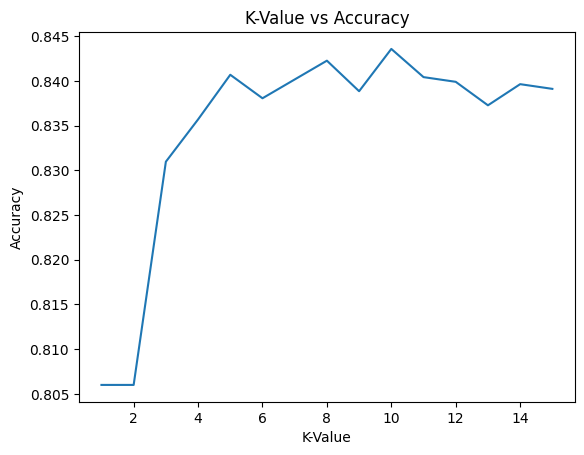

In [7]:
# Calculate and Graph classification accuracy vs k values
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_telescope, test_size=0.2, shuffle=True)

accuracies = []
k_values = []

for i in range(0, 15):
    k = i + 1
    clf.set_params(n_neighbors=k, weights='distance')
    clf.fit(X_train, y_train)
    k_values.append(k)
    accuracies.append(clf.score(X_test, y_test))

plt.plot(k_values, accuracies, label='K-Value vs Accuracy')
plt.title("K-Value vs Accuracy")
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.show()

*Discussion*: The accuracy generally improved as more nearest neighbors were taken into account, with the k=15 model getting the highest accuracy score of around .848. However, this is still a fairly low score, which can be explained in a couple different ways. The dataset could have a feature or multiple features that are not indicative of class. These features will still be taken into account in equal measure with the features that are indicative of class, which could cause dissimilar points to be nearest neighbors with one another, leading to misclassification. Another factor in the low accuracy could be a large number of noisy datapoints or outliers, which can act as misclassifying nearest neighbors that contribute to a low classification accuracy for the model as an overall whole.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

*Discuss the innapropriate feature*: The feature B is an inappropriate input feature that measures the proportion of black people that live in the area of the house of interest. This feature is inappropriate for a number of reasons, and can have extremely negative impacts in the ethicality of the model. The feature is inappropriate because it may cause the model to pick up on and adopt racist beliefs or methodologies that are unethical and should not have any practical influence on the price of a house. If a model trained on this feature is used in an official capacity, it has the potential to increase divisions of racism and classism, and could have immoral effects on the socio-economic makeup of an area due to race.

### 3.2 (15%) - KNN Regression 
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [8]:
from sklearn.metrics import mean_absolute_error

# Learn and experiment with housing price prediction data
housing_data = arff.loadarff('housing.arff')
housing_df = pd.DataFrame(housing_data[0])
X_housing = housing_df.drop('MEDV', axis=1)
y_housing = housing_df['MEDV']

table = []

def train_model(type, X, y, table:list, param='uniform') -> list:
    reg = KNeighborsRegressor(n_neighbors=3, weights=param)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    table.append([type, reg.score(X_train, y_train), reg.score(X_test, y_test), mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)])
    return table

table = train_model("No Normalization or Weighting", X_housing, y_housing, table)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_housing)
table = train_model("Normalization and No Weighting", X_normalized, y_housing, table)

table = train_model("Normalization and Weighting", X_normalized, y_housing, table, 'distance')


headers = ["Type", "Train Score", "Test Score", "Training MAE", "Testing MAE"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))

Type,Train Score,Test Score,Training MAE,Testing MAE
No Normalization or Weighting,0.788569,0.526006,2.81947,4.40784
Normalization and No Weighting,0.885043,0.781501,2.03391,2.79575
Normalization and Weighting,1,0.783177,0,2.59759


*Discuss your results*: The normalization and distance weighting helped dramatically with this dataset, much as I had expected from the earlier telescope dataset. The original test score was around .46. After normalization, the score had improved to .76, and after including distance weighting the score had improved again to .84. In the final model, the testing mean absolute error was only 2.388. Although this error is not insignificant, it is around half of the mean absolute error from the test set in the first model, which was about 4.78. This is likely because there were large-scale features that influenced the set dramatically before normalization. 

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each. 

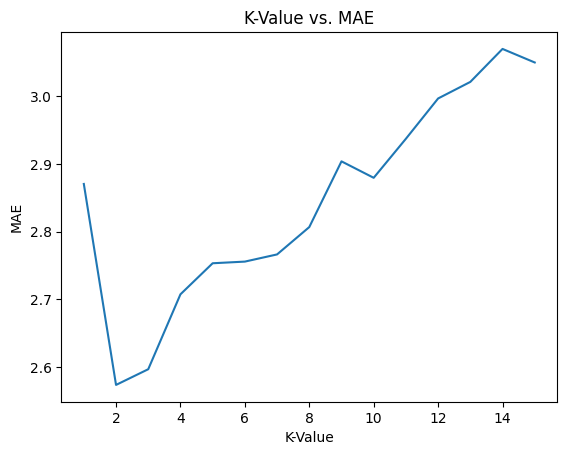

In [9]:
# Learn and graph for different k values
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_housing, test_size=0.2, shuffle=True)
reg = KNeighborsRegressor(n_neighbors=3, weights='distance')

accuracies = []
k_values = []

for i in range(0, 15):
    k = i + 1
    reg.set_params(n_neighbors=k)
    reg.fit(X_train, y_train)
    y_test_pred = reg.predict(X_test)
    k_values.append(k)
    accuracies.append(mean_absolute_error(y_test, y_test_pred))

plt.plot(k_values, accuracies, label='K-Value vs. MAE')
plt.title("K-Value vs. MAE")
plt.xlabel("K-Value")
plt.ylabel("MAE")
plt.show()

Discussion: The MAE generally grew as the value of k grew. It reached a minimum when the k value was around 2 or 3, then grew after that. This makes sense, because the true value of any given point is a continuous value. This means that as points are further and further from the point of interest and are given a say in what the value should be, they will drag the predicted value further and further away from where it should be. This is different from classification, in which points do not become more drastically different the further they are from the point of interest. They may be a different class, but there is no gradient of difference that the points are located on.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes 
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1 
- Use your own choice for k and other parameters

In [10]:
from sklearn.preprocessing import LabelEncoder
# Train/Predict lymph with your own distance metric
lymph_data = arff.loadarff('lymph.arff')
lymph_df = pd.DataFrame(lymph_data[0])
X_lymph = lymph_df.drop('class', axis=1)
y_lymph = lymph_df['class']

nominal_features = ['lymphatics','block_of_affere', 'bl_of_lymph_c', 'bl_of_lymph_s', 'by_pass', 'extravasates', 'regeneration_of', 'early_uptake_in', 'changes_in_lym', 'defect_in_node', 'changes_in_node', 'changes_in_stru', 'special_forms', 'dislocation_of', 'exclusion_of_no']
nominal_indices = []
encoder = LabelEncoder()

y_lymph = encoder.fit_transform(y_lymph)
for feature in nominal_features:
    X_lymph[feature] = encoder.fit_transform(X_lymph[feature])
    nominal_indices.append(lymph_df.columns.get_loc(feature))

    
def mydist(point_1, point_2):
    distance = 0.0
    for i in range(len(point_1)):
        if i in nominal_indices:
            if (point_1[i] != point_2[i]):
                distance += 1
        else:
            distance += (point_1[i] - point_2[i])**2
    finished_euclidean_distance = np.sqrt(distance)
    return finished_euclidean_distance
    
clf = KNeighborsClassifier(metric=mydist, n_neighbors=15, weights='distance')
X_train, X_test, y_train, y_test = train_test_split(X_lymph, y_lymph, test_size=0.2, shuffle=True)
table = []
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

table.append([clf.score(X_train, y_train), clf.score(X_test, y_test), mean_absolute_error(y_train_pred, y_train), mean_absolute_error(y_test_pred, y_test)])

headers = ["Train Score", "Test Score", "Training MAE", "Testing MAE"]
display(HTML(tabulate(table, headers=headers, tablefmt='html')))

Train Score,Test Score,Training MAE,Testing MAE
1,0.8,0,0.266667


*Explain your distance metric and discuss your results*

## 5. (Optional 15% extra credit) Code up your own KNN Learner 
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below
- Use Euclidean distance to decide closest neighbors
- Implement both the classification and regression versions
- Include optional distance weighting for both algorithms
- Run your algorithm on the magic telescope and housing data sets above and discuss and compare your results 

*Discussion*

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class KNNClassifier(BaseEstimator,ClassifierMixin):
    def __init__(self, columntype=[], weight_type='inverse_distance'): ## add parameters here
        
        """
        Args:
            columntype for each column tells you if continues[real] or if nominal[categoritcal].
            weight_type: inverse_distance voting or if non distance weighting. Options = ["no_weight","inverse_distance"]
        """
        self.columntype = columntype #Note This won't be needed until part 5
        self.weight_type = weight_type
        self.X = []
        self.y = []

    def fit(self, data, labels):
        """ Fit the data; run the algorithm (for this lab really just saves the data :D)
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        
        self.X = data
        self.y = labels
        return self
    
    def predict(self, data):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        def calculate_distance(point_1, point_2):
            distance = 0
            for i in range(len(point_1)):
                if type(point_1[i]) is str:
                    if point_1[i] != point_2[i]:
                        distance += 1
                else:
                    distance += (point_1[i] - point_2[i])**2
            return np.sqrt(distance)
        predictions = []
        for sample in data:
            distances = []  # To store (distance, class) for each neighbor
            for i, train_sample in enumerate(self.X):
                dist = calculate_distance(sample, train_sample)
                distances.append((dist, self.y.iloc[i]))

            # Sort distances and get the k nearest neighbors
            distances.sort(key=lambda x: x[0])
            nearest_neighbors = distances[:self.k]

            if self.weight_type == "inverse_distance":
                # Weighted voting based on inverse distances
                class_count = {}
                for dist, label in nearest_neighbors:
                    if dist == 0:
                        weight = float("inf")  # Prevent division by zero
                    else:
                        weight = 1 / dist
                    class_count[label] = class_count.get(label, 0) + weight

                predicted_class = max(class_count, key=class_count.get)
            else:
                # Simple majority voting (no distance weighting)
                labels = [neighbor[1] for neighbor in nearest_neighbors]
                predicted_class = max(set(labels), key=labels.count)

            predictions.append(predicted_class)

        return np.array(predictions)

    #Returns the Mean score given input data and labels
    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : floats
                Mean accuracy of self.predict(X) wrt. y.
        """

        predictions = self.predict(X)
        num_correct = 0
        for i, prediction in enumerate(predictions):
            if prediction == self.y[i]:
                num_correct += 1
        return num_correct/len(predictions)

clf = KNNClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_telescope, y_telescope)
clf.fit(X_train, y_train)
print(str(clf.score(X_test, y_test)))


IndexError: string index out of range